In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
list_df = []
for i in range(10):
    df_tmp = pd.read_csv("schematic/data/ladder3_l3w3-"+str(i+1)+".txt", delimiter="\s+")
    df_tmp["bit"] = df_tmp.index
    df_tmp["v(b0)"] = (df_tmp["v(b0)"] > 1e-3).astype(float)
    df_tmp["v(b1)"] = (df_tmp["v(b1)"] > 1e-3).astype(float)
    df_tmp["v(b2)"] = (df_tmp["v(b2)"] > 1e-3).astype(float)
    df_tmp["src"] = np.ones(len(df_tmp.iloc[:, [1]]))
    df_tmp["lsb"] = df_tmp["i(Vbias)"]/8
# my_df = pd.read_csv("sample_data/mcdactut1.txt", delimiter="\s+")
    df_tmp["dnl"] = np.array([df_tmp.lsb.iloc[0]]+list(df_tmp["i(viout)"].iloc[1:].values - df_tmp["i(viout)"].iloc[0:-1].values))-df_tmp["lsb"]
    df_tmp["inl"] = df_tmp["dnl"].cumsum()
    list_df.append(df_tmp)

In [5]:
my_df = pd.concat(list_df).reset_index(drop=True)

my_df.head()

,b0,v(b0),v(b1),v(b2),i(Vbias),i(viout),v(vbout),bit,src,lsb,dnl,inl
0,3.251139e-09,0.0,0.0,0.0,8.038737e-07,8.669954e-12,0.125532,0,1.0,1.004842e-07,0.000000e+00,0.000000e+00
1,6.178217e-01,1.0,0.0,0.0,8.038744e-07,1.428710e-07,0.502094,1,1.0,1.004843e-07,4.237804e-08,4.237804e-08
2,3.251139e-09,0.0,1.0,0.0,8.038744e-07,2.797794e-07,0.531424,2,1.0,1.004843e-07,3.642405e-08,7.880209e-08
3,6.178218e-01,1.0,1.0,0.0,8.038752e-07,4.074495e-07,0.548318,3,1.0,1.004844e-07,2.718571e-08,1.059878e-07
4,3.251139e-09,0.0,0.0,1.0,8.038744e-07,4.972820e-07,0.557470,4,1.0,1.004843e-07,-1.065173e-08,9.533607e-08


In [6]:
7.321793e-07/8

9.15224125e-08

Text(0, 0.5, 'DNL (LSB^{-1})')

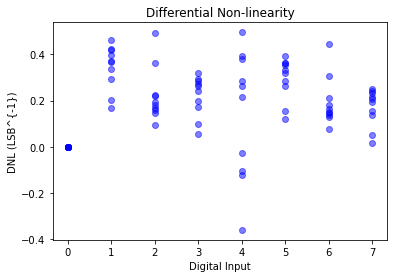

In [10]:
fig, ax = plt.subplots()
ax.plot(my_df.bit, my_df.dnl/my_df.lsb, "bo", alpha=0.5)
# ax.
# ax.plot(my_df["i(Vbias)"]/8)
ax.set_title("Differential Non-linearity")
ax.set_xlabel("Digital Input")
ax.set_ylabel("DNL (LSB^{-1})")

Text(0, 0.5, 'INL ($LSB$)')

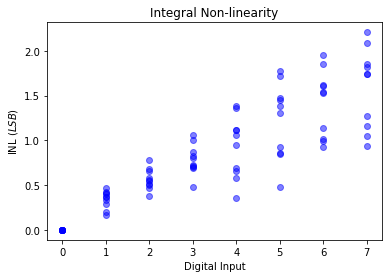

In [9]:
fig, ax = plt.subplots()
ax.plot(my_df.bit, my_df.inl/my_df.lsb, "bo", alpha=0.5)
ax.set_title("Integral Non-linearity")
ax.set_xlabel("Digital Input")
ax.set_ylabel("INL ($LSB$)")